### Read mesh from .foam file

['outlet', 'inlet', 'free_slip', 'ground'] ['internalMesh', 'boundary']


/home/ubuntu/.cache/pypoetry/virtualenvs/cfdmod-7yEqALRC-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


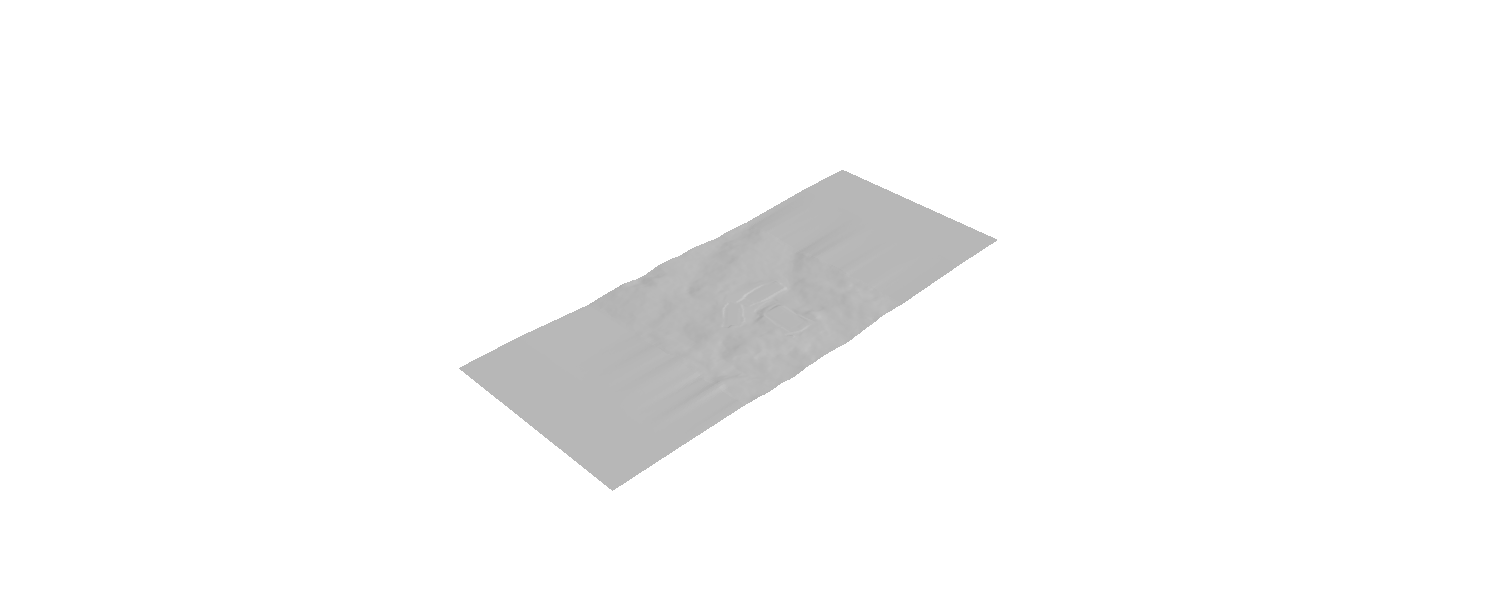

In [1]:
import pyvista as pv
import pathlib

case_folder = pathlib.Path("path/to/case.foam")
reader = pv.POpenFOAMReader(case_folder)

reader.case_type = "decomposed"
reader._update_information()
mesh = reader.read()

boundary_mesh = mesh["boundary"]
print(mesh["boundary"].keys(), mesh.keys())

plotter = pv.Plotter(off_screen=False, lighting="three lights")

plotter.add_mesh(
    boundary_mesh["ground"], color="gray", opacity=0.5
)  # Replace "U" with the desired field name
plotter.show(window_size=[1500, 600])

### Read directly from .stl

/home/ubuntu/.cache/pypoetry/virtualenvs/cfdmod-7yEqALRC-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


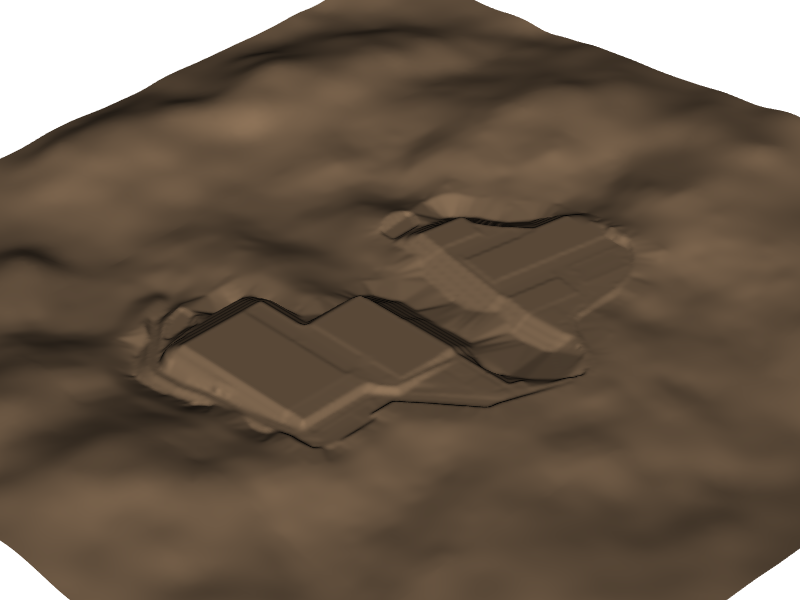

In [3]:
import pyvista as pv
import pathlib
import numpy as np

mesh_path = pathlib.Path("./fixtures/tests/altimetry/terrain.stl")

mesh = pv.read(mesh_path)

# plotter = pv.Plotter(off_screen=True, lighting="three lights")
plotter = pv.Plotter(off_screen=True, lighting="none")

# Intensity: 1
# Light position: (x=+-5, y=+-5, z=1)
# plotter = pv.Plotter(lighting='none', window_size=(1000, 1000))
# plotter.add_mesh(mesh, color='white', smooth_shading=True, specular=0.5, specular_power=15)
# mesh.plot(diffuse=0.5, specular=0.5, ambient=0.5, cpos=cpos, show_scalar_bar=False)

# light = pv.Light()
# light = pv.Light(position=(1, 0, 1), light_type='camera light')
light = pv.Light(position=(1, 1, 1), light_type="scene light")
# light = pv.Light(light_type='headlight')
# light.set_direction_angle(45, 45)
plotter.add_light(light)
# plotter.enable_shadows()


plotter.view_isometric()

# plotter.add_mesh(mesh, color="#9a7d60")
plotter.add_mesh(mesh, color="#9a7d60", smooth_shading=True, specular=0.5, specular_power=100)
# plotter.add_mesh(mesh, color="#9a7d60", smooth_shading=True, diffuse=0.5, specular=0.5, ambient=0.5)
camera = plotter.camera
camera.zoom(2.5)
plotter.show(window_size=[800, 600])